In [1]:
# --- Parte 1: Imports ---
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Importar nuestro script de preprocesamiento
sys.path.append(os.path.abspath(".."))  # asegurar que Jupyter encuentre la carpeta scripts
from scripts.preprocessing import load_and_preprocess

# Cargar datos y preprocessor
X_train, X_test, y_train, y_test, preprocessor = load_and_preprocess()


In [2]:
from sklearn import set_config
set_config(display="diagram")  # para ver el pipeline como diagrama en Jupyter

# Crear pipeline con preprocessor + RandomForest
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
rf_clf.fit(X_train, y_train)

# Predicciones
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

# Métricas
print("Reporte en TRAIN (Random Forest inicial):")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST (Random Forest inicial):")
print(classification_report(y_test, y_test_pred))


Reporte en TRAIN (Random Forest inicial):
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        42
           1       0.96      0.98      0.97       114

    accuracy                           0.96       156
   macro avg       0.95      0.93      0.94       156
weighted avg       0.95      0.96      0.95       156


Reporte en TEST (Random Forest inicial):
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.83      0.86      0.84        28

    accuracy                           0.77        39
   macro avg       0.71      0.70      0.71        39
weighted avg       0.76      0.77      0.77        39



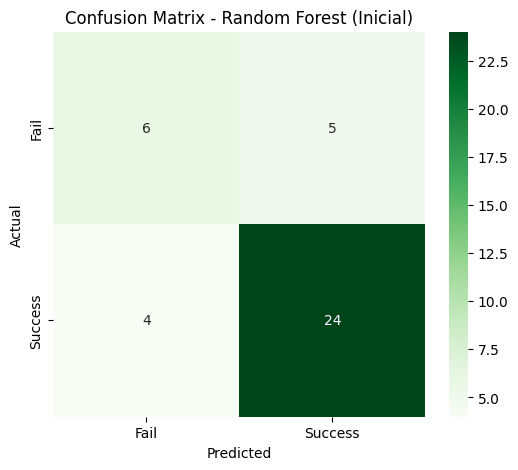

In [3]:
# Matriz de confusión para Random Forest inicial
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Fail", "Success"],
            yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Inicial)")
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Pipeline con RandomForest
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Definir grid de hiperparámetros
param_grid = {
    "classifier__n_estimators": [100, 200, 300],      # nº de árboles
    "classifier__max_depth": [None, 5, 10, 20],       # profundidad máxima
    "classifier__min_samples_split": [2, 5, 10],      # división mínima
    "classifier__class_weight": [None, "balanced"]    # balance de clases
}

# GridSearch con validación cruzada
grid_search = GridSearchCV(
    rf_clf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Entrenar
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score en validación cruzada:")
print(grid_search.best_score_)


Mejores parámetros encontrados:
{'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}

Mejor score en validación cruzada:
0.8266129032258064


Reporte en TRAIN (mejor RF):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        42
           1       0.96      0.96      0.96       114

    accuracy                           0.94       156
   macro avg       0.93      0.92      0.93       156
weighted avg       0.94      0.94      0.94       156


Reporte en TEST (mejor RF):
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.83      0.86      0.84        28

    accuracy                           0.77        39
   macro avg       0.71      0.70      0.71        39
weighted avg       0.76      0.77      0.77        39



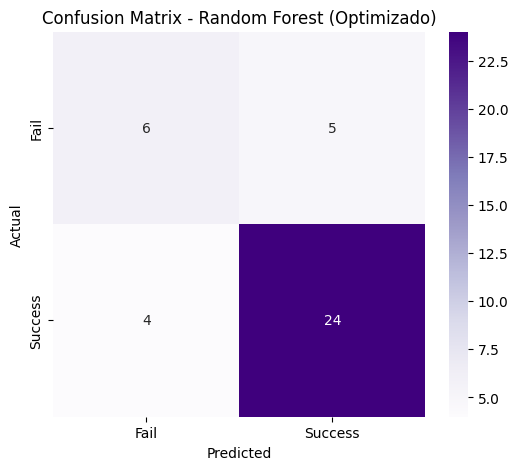

In [5]:
# Mejor modelo
best_rf = grid_search.best_estimator_

# Predicciones
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

print("Reporte en TRAIN (mejor RF):")
print(classification_report(y_train, y_train_pred))

print("\nReporte en TEST (mejor RF):")
print(classification_report(y_test, y_test_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Fail", "Success"],
            yticklabels=["Fail", "Success"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (Optimizado)")
plt.show()
